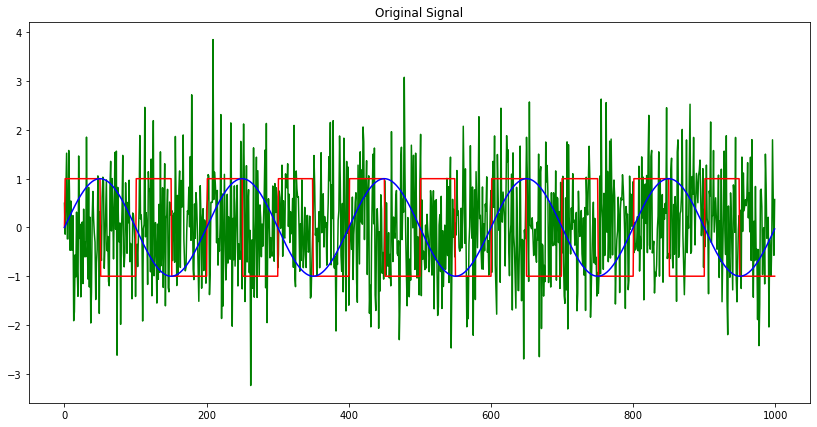

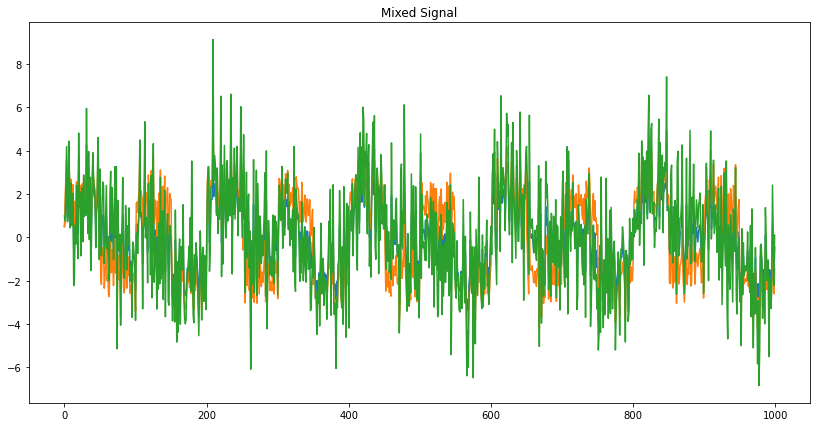

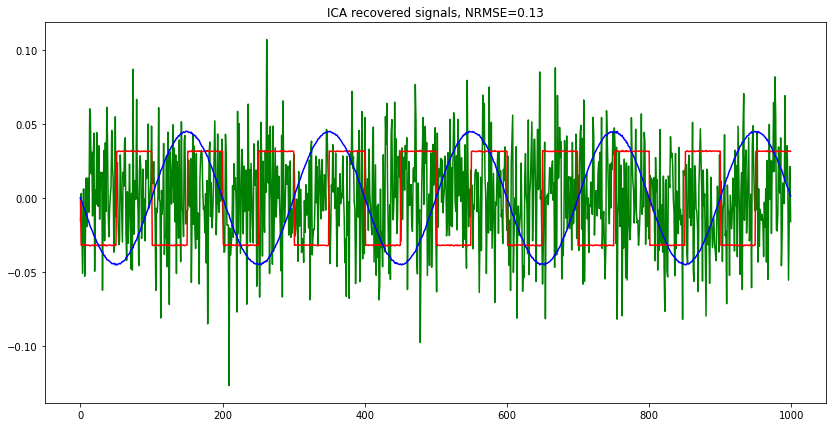

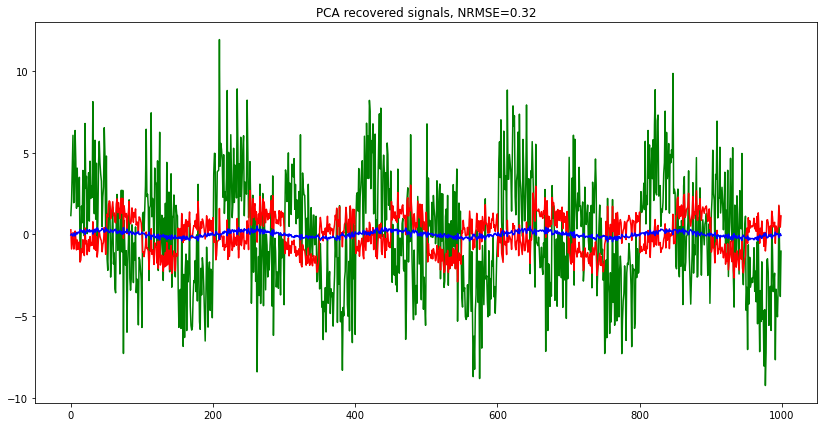

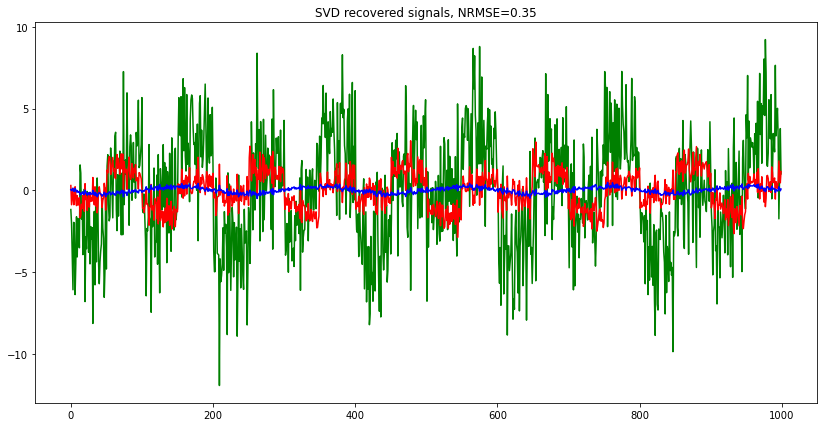

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
from scipy.linalg import svd

# 设置随机种子，以确保可复现性
np.random.seed(42)

# 生成混合信号
t = np.arange(0, 1, 1/1000)  # 时间范围
s1 = np.sin(2 * np.pi * 5 * t)  # 信号1：正弦波
s2 = np.sign(np.sin(2 * np.pi * 10 * t))  # 信号2：方波
s3 = np.random.randn(t.size)  # 信号3：随机噪声

S = np.c_[s1, s2, s3]  # 堆叠信号矩阵
# 混合信号
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # 混合矩阵
X = S.dot(A.T)  # 观测到的混合信号

# 对比ICA、PCA和SVD的效果

# ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)
# A_ = ica.mixing_

# PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

# SVD
U, S0, Vt = svd(X)
S0 = np.diag(S0)
H_svd = X.dot(Vt.T)

# 绘制结果
plt.figure(1, figsize=(14,7))
plt.plot(S[:,2], color = 'green')
plt.plot(S[:,1], color = 'red')
plt.plot(S[:,0], color = 'blue')
plt.title('Original Signal')

plt.figure(2, figsize=(14,7))
plt.plot(X)
plt.title('Mixed Signal')

plt.figure(3, figsize=(14,7))
plt.plot(S_[:,1], color = 'green')
plt.plot(S_[:,0], color = 'red')
plt.plot(S_[:,2], color = 'blue')
plt.title('ICA recovered signals, NRMSE=0.13')

plt.figure(4, figsize=(14,7))
plt.plot(H[:,0], color = 'green')
plt.plot(H[:,1], color = 'red')
plt.plot(H[:,2], color = 'blue')
plt.title('PCA recovered signals, NRMSE=0.32')

plt.figure(5, figsize=(14,7))
plt.plot(H_svd[:,0], color = 'green')
plt.plot(H_svd[:,1], color = 'red')
plt.plot(H_svd[:,2], color = 'blue')
plt.title('SVD recovered signals, NRMSE=0.35')

# # 标准化均方根误差(NRMSE)函数
# def calculate_nrmse(original_signal, denoised_signal):
#     rmse = np.sqrt(np.mean((original_signal - denoised_signal)**2))
#     signal_range = np.max(original_signal) - np.min(original_signal)
#     nrmse = rmse / signal_range
#     return nrmse

# print(calculate_nrmse(S, H_svd))

plt.show()
